## Задача: Управление посадкой лунного модуля (LunarLander-v3)

**Цель:** обучить агента успешно приземляться, минимизируя скорость и расход топлива.

**Обоснование выбора RL:** среда обладает непрерывным состоянием, дискретными действиями и отложенными наградами — это делает её идеальной для методов обучения с подкреплением.

**Описание среды:**
- **Состояние:** 8-мерный вектор (позиция, скорость, угол, контакты ног).
- **Действия:** дискретные — ничего не делать, основной двигатель, левый, правый.
- **Награда:** положительная за посадку, отрицательная за расход топлива и жёсткую посадку.

Ниже представлен код настройки среды, обучения модели и визуализации её работы.


In [1]:
!apt-get update > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!apt-get install -y swig build-essential python-dev python3-dev > /dev/null 2>&1
!apt-get install x11-utils > /dev/null 2>&1
!apt-get install xvfb > /dev/null 2>&1

In [2]:
!pip install rarfile --quiet
!pip install 'stable-baselines3[extra]' --quiet
!pip install ale-py --quiet
!pip install swig
!pip install gym --quiet
!pip install pyvirtualdisplay --quiet
!pip install pyglet --quiet
!pip install pygame --quiet
!pip install minigrid --quiet
!pip install -q swig --quiet
!pip install -q gymnasium --quiet
!pip install 'minigrid<=2.1.1' --quiet
!pip3 install box2d-py --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 99.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

In [3]:
!pip install --upgrade gymnasium[all]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 19.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.4/243.4 kB 18.9 MB/s eta 0:00:00
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp311-cp311-linux_x86_64.whl size=2379447 sha256=99fcf4dfb7e73ab2b7eb1c2f525535afff2c42cf8144117d3b98d646e503fdff
  Stored in directory: /root/.cache/pip/wheels/ab/f1/0c/d56f4a2bdd12bae0a0693ec33f2f0daadb5eb9753c78fa5308
Successfully built box2d-py
  Attempting uninstall: box2d-py
    Found existing installation: box2d-py 2.3.8
    Uninstalling box2d-py-2.3.8:
      Successfully uninstalled box2d-py-2.3.8
  Attempting uninstal

In [4]:
import io
import os
import glob
import torch
import base64

import numpy as np
import matplotlib.pyplot as plt

import sys
import gymnasium
sys.modules["gym"] = gymnasium

import stable_baselines3
from stable_baselines3 import DQN
from stable_baselines3.common.results_plotter import ts2xy, load_results
from stable_baselines3.common.callbacks import EvalCallback
from stable_baselines3.common.env_util import make_atari_env

import gymnasium as gym
from gym import spaces
from gym.envs.box2d.lunar_lander import *
from gymnasium.wrappers import RecordVideo

/usr/local/lib/python3.11/dist-packages/gymnasium/envs/registration.py:644: UserWarning: WARN: Overriding environment CartPole-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/usr/local/lib/python3.11/dist-packages/gymnasium/envs/registration.py:644: UserWarning: WARN: Overriding environment CartPole-v1 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/usr/local/lib/python3.11/dist-packages/gymnasium/envs/registration.py:644: UserWarning: WARN: Overriding environment MountainCar-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/usr/local/lib/python3.11/dist-packages/gymnasium/envs/registration.py:644: UserWarning: WARN: Overriding environment MountainCarContinuous-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/usr/local/lib/python3.11/dist-packages/gymnasium/envs/registration.py:644: 

In [5]:
from stable_baselines3.common.callbacks import BaseCallback

In [6]:
from stable_baselines3.common.monitor import Monitor

In [7]:
from IPython.display import HTML
from base64 import b64encode
from pyvirtualdisplay import Display
os.makedirs("./video", exist_ok=True)

display = Display(visible=False, size=(1400, 900))
_ = display.start()
def render_mp4(videopath: str) -> str:
  mp4 = open(videopath, 'rb').read()
  base64_encoded_mp4 = b64encode(mp4).decode()
  return f'<video width=400 controls><source src="data:video/mp4;' \
         f'base64,{base64_encoded_mp4}" type="video/mp4"></video>'

In [8]:
nn_layers = [64, 64]
learning_rate = 0.001
log_dir = "/tmp/gym/"
video_dir = "video/"
env_name = 'LunarLander-v3'

os.makedirs(log_dir, exist_ok=True)
os.makedirs(video_dir, exist_ok=True)

In [9]:
env = gym.make(env_name)
env = Monitor(env, log_dir)
callback = EvalCallback(env, log_path=log_dir, deterministic=True)

In [10]:
policy_kwargs = dict(
    activation_fn=torch.nn.ReLU,
    net_arch=nn_layers
)
model = DQN(
    "MlpPolicy", env,
    policy_kwargs=policy_kwargs,
    learning_rate=learning_rate,
    batch_size=1,
    buffer_size=1,
    learning_starts=1,
    gamma=0.99,
    tau=1,
    target_update_interval=1,
    train_freq=(1, "step"),
    max_grad_norm=10,
    exploration_initial_eps=1,
    exploration_fraction=0.5,
    gradient_steps=1,
    seed=1,
    verbose=0
)

print('State shape: ', env.observation_space.shape)
print('Number of actions: ', env.action_space.n)

State shape:  (8,)
Number of actions:  4


In [11]:
env = gym.make(env_name, render_mode="rgb_array")
env = RecordVideo(env, video_folder=video_dir, episode_trigger=lambda ep: True)

/usr/local/lib/python3.11/dist-packages/gymnasium/wrappers/rendering.py:283: UserWarning: WARN: Overwriting existing videos at /content/video folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


In [12]:
observation, _ = env.reset()
done = False
total_reward = 0

In [13]:
while not done:
    action, _ = model.predict(observation, deterministic=True)
    observation, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    total_reward += reward
env.close()
print(f"\nTotal reward: {total_reward}")


Total reward: -695.3558573911272


In [14]:
from IPython.display import HTML
from base64 import b64encode

In [15]:
def render_mp4(path):
    mp4 = open(path,'rb').read()
    data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
    return f'<video width=640 controls><source src="{data_url}" type="video/mp4"></video>'
video_path = sorted(glob.glob(f"{video_dir}/*.mp4"))[-1]
HTML(render_mp4(video_path))

In [16]:
model.learn(total_timesteps=100000, log_interval=10, callback=callback)

Eval num_timesteps=10000, episode_reward=-1106.33 +/- 418.57
Episode length: 153.60 +/- 32.68
New best mean reward!
Eval num_timesteps=20000, episode_reward=-320.29 +/- 43.50
Episode length: 138.80 +/- 30.79
New best mean reward!
Eval num_timesteps=30000, episode_reward=-294.07 +/- 47.17
Episode length: 132.80 +/- 19.68
New best mean reward!
Eval num_timesteps=40000, episode_reward=-225.57 +/- 32.38
Episode length: 250.00 +/- 25.53
New best mean reward!
Eval num_timesteps=50000, episode_reward=-35.58 +/- 29.33
Episode length: 197.00 +/- 55.29
New best mean reward!
Eval num_timesteps=60000, episode_reward=-146.43 +/- 35.76
Episode length: 635.00 +/- 60.28
Eval num_timesteps=70000, episode_reward=120.11 +/- 85.86
Episode length: 630.20 +/- 332.27
New best mean reward!
Eval num_timesteps=80000, episode_reward=27.14 +/- 120.29
Episode length: 121.40 +/- 84.05
Eval num_timesteps=90000, episode_reward=132.10 +/- 98.16
Episode length: 702.80 +/- 198.32
New best mean reward!
Eval num_timesteps

In [43]:
env = gym.make(env_name, render_mode="rgb_array")
env = RecordVideo(
    env,
    video_folder="video/",
    name_prefix=f"{env_name}_learned",
    episode_trigger=lambda ep: True
)
observation, _ = env.reset()
total_reward = 0
done = False
while not done:
    action, _ = model.predict(observation, deterministic=True)
    observation, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    total_reward += reward
env.close()
print(f"\ntotal reward: {total_reward}")


total reward: 232.5895033189807


In [44]:
import os
print(os.listdir("video"))

['LunarLander-v3_final-episode-0.mp4', 'LunarLander-v3_learned-episode-0.mp4', 'rl-video-episode-0.mp4']


In [45]:
from IPython.display import HTML
from base64 import b64encode
def render_mp4(path):
    mp4 = open(path, 'rb').read()
    data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
    return HTML(f'<video width=640 controls><source src="{data_url}" type="video/mp4"></video>')
render_mp4("video/LunarLander-v3_learned-episode-0.mp4")

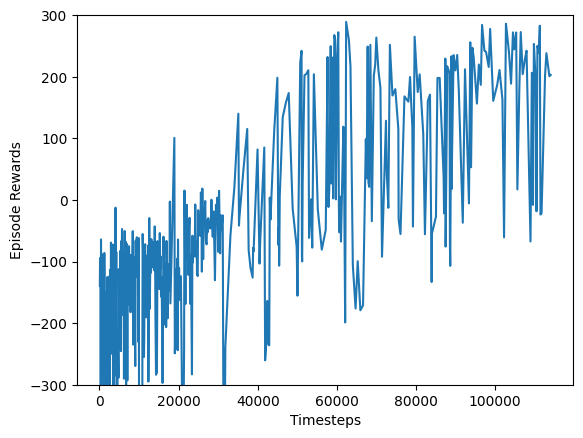

In [46]:
x, y = ts2xy(load_results(log_dir), 'timesteps')
plt.plot(x, y)
plt.ylim([-300, 300])
plt.xlabel('Timesteps')
plt.ylabel('Episode Rewards')
plt.show()

In [47]:
exploration_initial_eps = 1
exploration_fraction = 0.5
exploration_final_eps = 0.05

In [48]:
class Custom_LunarLander(LunarLander):
    def step(self, action):
        assert self.lander is not None

        assert self.lander is not None, "You forgot to call reset()"
        if self.enable_wind and not (
            self.legs[0].ground_contact or self.legs[1].ground_contact
        ):
            wind_mag = (
                math.tanh(
                    math.sin(0.02 * self.wind_idx)
                    + (math.sin(math.pi * 0.01 * self.wind_idx))
                )
                * self.wind_power
            )
            self.wind_idx += 1
            self.lander.ApplyForceToCenter(
                (wind_mag, 0.0),
                True,
            )

            torque_mag = math.tanh(
                math.sin(0.02 * self.torque_idx)
                + (math.sin(math.pi * 0.01 * self.torque_idx))
            ) * (self.turbulence_power)
            self.torque_idx += 1
            self.lander.ApplyTorque(
                (torque_mag),
                True,
            )

        if self.continuous:
            action = np.clip(action, -1, +1).astype(np.float32)
        else:
            assert self.action_space.contains(
                action
            ), f"{action!r} ({type(action)}) invalid "

        tip = (math.sin(self.lander.angle), math.cos(self.lander.angle))
        side = (-tip[1], tip[0])
        dispersion = [self.np_random.uniform(-1.0, +1.0) / SCALE for _ in range(2)]

        m_power = 0.0
        if (self.continuous and action[0] > 0.0) or (
            not self.continuous and action == 2
        ):
            if self.continuous:
                m_power = (np.clip(action[0], 0.0, 1.0) + 1.0) * 0.5  # 0.5..1.0
                assert m_power >= 0.5 and m_power <= 1.0
            else:
                m_power = 1.0
            ox = tip[0] * (4 / SCALE + 2 * dispersion[0]) + side[0] * dispersion[1]
            oy = -tip[1] * (4 / SCALE + 2 * dispersion[0]) - side[1] * dispersion[1]
            impulse_pos = (self.lander.position[0] + ox, self.lander.position[1] + oy)
            p = self._create_particle(
                3.5,
                impulse_pos[0],
                impulse_pos[1],
                m_power,
            )
            p.ApplyLinearImpulse(
                (ox * MAIN_ENGINE_POWER * m_power, oy * MAIN_ENGINE_POWER * m_power),
                impulse_pos,
                True,
            )
            self.lander.ApplyLinearImpulse(
                (-ox * MAIN_ENGINE_POWER * m_power, -oy * MAIN_ENGINE_POWER * m_power),
                impulse_pos,
                True,
            )

        s_power = 0.0
        if (self.continuous and np.abs(action[1]) > 0.5) or (
            not self.continuous and action in [1, 3]
        ):
            if self.continuous:
                direction = np.sign(action[1])
                s_power = np.clip(np.abs(action[1]), 0.5, 1.0)
                assert s_power >= 0.5 and s_power <= 1.0
            else:
                direction = action - 2
                s_power = 1.0
            ox = tip[0] * dispersion[0] + side[0] * (
                3 * dispersion[1] + direction * SIDE_ENGINE_AWAY / SCALE
            )
            oy = -tip[1] * dispersion[0] - side[1] * (
                3 * dispersion[1] + direction * SIDE_ENGINE_AWAY / SCALE
            )
            impulse_pos = (
                self.lander.position[0] + ox - tip[0] * 17 / SCALE,
                self.lander.position[1] + oy + tip[1] * SIDE_ENGINE_HEIGHT / SCALE,
            )
            p = self._create_particle(0.7, impulse_pos[0], impulse_pos[1], s_power)
            p.ApplyLinearImpulse(
                (ox * SIDE_ENGINE_POWER * s_power, oy * SIDE_ENGINE_POWER * s_power),
                impulse_pos,
                True,
            )
            self.lander.ApplyLinearImpulse(
                (-ox * SIDE_ENGINE_POWER * s_power, -oy * SIDE_ENGINE_POWER * s_power),
                impulse_pos,
                True,
            )

        self.world.Step(1.0 / FPS, 6 * 30, 2 * 30)

        pos = self.lander.position
        vel = self.lander.linearVelocity
        state = [
            (pos.x - VIEWPORT_W / SCALE / 2) / (VIEWPORT_W / SCALE / 2),
            (pos.y - (self.helipad_y + LEG_DOWN / SCALE)) / (VIEWPORT_H / SCALE / 2),
            vel.x * (VIEWPORT_W / SCALE / 2) / FPS,
            vel.y * (VIEWPORT_H / SCALE / 2) / FPS,
            self.lander.angle,
            20.0 * self.lander.angularVelocity / FPS,
            1.0 if self.legs[0].ground_contact else 0.0,
            1.0 if self.legs[1].ground_contact else 0.0,
        ]
        assert len(state) == 8
        reward = 0
        shaping = (
            -100 * np.sqrt(state[0] * state[0] + state[1] * state[1])
            - 100 * np.sqrt(state[2] * state[2] + state[3] * state[3])
            - 100 * abs(state[4])
            + 10 * state[6]
            + 10 * state[7]
        )
        if self.prev_shaping is not None:
            reward = shaping - self.prev_shaping
        self.prev_shaping = shaping

        reward -= (
            m_power * 0.30
        )
        reward -= s_power * 0.03

        terminated = False
        if self.game_over or abs(state[0]) >= 1.0:
            terminated = True
            reward = -100
        if not self.lander.awake:
            terminated = True
            reward = +100

        if self.render_mode == "human":
            self.render()
        return np.array(state, dtype=np.float32), reward, terminated, False, {}

In [49]:
def step(self, actions):
  state = [
            (pos.x - VIEWPORT_W / SCALE / 2) / (VIEWPORT_W / SCALE / 2),
            (pos.y - (self.helipad_y + LEG_DOWN / SCALE)) / (VIEWPORT_H / SCALE / 2),
            vel.x * (VIEWPORT_W / SCALE / 2) / FPS,
            vel.y * (VIEWPORT_H / SCALE / 2) / FPS,
            self.lander.angle,
            20.0 * self.lander.angularVelocity / FPS,
            1.0 if self.legs[0].ground_contact else 0.0,
            1.0 if self.legs[1].ground_contact else 0.0,
        ]

In [50]:
import gymnasium as gym
env = gym.make(env_name, render_mode="rgb_array")

In [51]:
env = gym.make(env_name, render_mode="rgb_array")
env = RecordVideo(
    env,
    video_folder="video/",
    name_prefix=f"{env_name}_final",
    episode_trigger=lambda ep: True
)
observation, _ = env.reset()
done = False
total_reward = 0
while not done:
    action, _ = model.predict(observation, deterministic=True)
    observation, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    total_reward += reward

env.close()
print(f"финальное вознаграждение: {total_reward:.2f}")

/usr/local/lib/python3.11/dist-packages/gymnasium/wrappers/rendering.py:283: UserWarning: WARN: Overwriting existing videos at /content/video folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


финальное вознаграждение: 213.53


In [52]:
from IPython.display import HTML
from base64 import b64encode

def render_mp4(path):
    mp4 = open(path, 'rb').read()
    data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
    return HTML(f'<video width=640 controls><source src="{data_url}" type="video/mp4"></video>')

render_mp4("video/LunarLander-v3_final-episode-0.mp4")